<a href="https://colab.research.google.com/github/thekaszsz/ML_book/blob/main/sklearn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

정답률 : 96.0 %


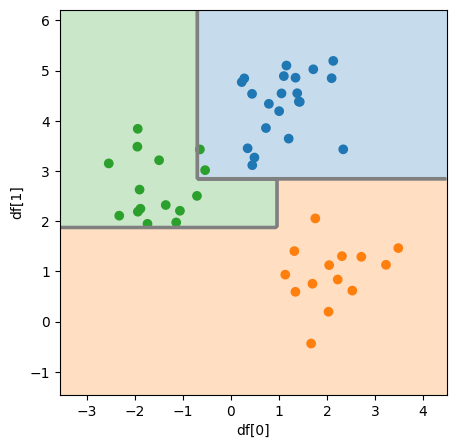

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 산포도에 분류 상태를 그리는 함수
def plot_boundary(model, X, Y, target, xlabel, ylabel):
    # 점과 색칠 컬러맵
    cmap_dots = ListedColormap([ "#1f77b4", "#ff7f0e", "#2ca02c"])
    cmap_fills = ListedColormap([ "#c6dcec", "#ffdec2", "#cae7ca"])

    plt.figure(figsize=(5, 5))
    # 모델이 있으면 표시 범위의 점을 모두 예측해서 색을 칠한다
    if model:
        # 표시 범위를 조금 넓혀 분할하고, 조사하는 점(200x200)을 준비한다
        XX, YY = np.meshgrid(
            np.linspace(X.min()-1, X.max()+1, 200),
            np.linspace(Y.min()-1, Y.max()+1, 200))
        # 모든 점의 값을 모델로 예측한다
        pred = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
        #　예측결괏값(0~2)의 색(cmap_fills)으로 칠한다
        plt.pcolormesh(XX, YY, pred, cmap=cmap_fills, shading="auto")
        #　경계를 회색으로 칠한다
        plt.contour(XX, YY, pred, colors="gray")
    #　target의 값(0~2)의 색(cmap_dots)으로 점을 그린다
    plt.scatter(X, Y, c=target, cmap=cmap_dots)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

X, y = make_blobs(
    random_state = 0,
    n_features = 2,
    centers = 3,
    cluster_std = 0.6,
    n_samples = 200
)

X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 0)

model = DecisionTreeClassifier(max_depth = None, random_state = 0)
model.fit(X_train, y_train)

pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print('정답률 :', score*100, '%')

df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, 'df[0]', 'df[1]')


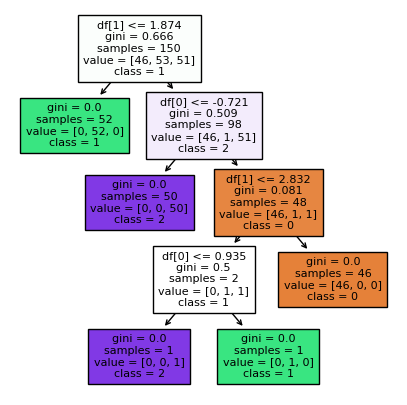

In [7]:
from sklearn.tree import plot_tree

plt.figure(figsize = (5,5))
plot_tree(model, fontsize = 8, filled = True,
          feature_names = ['df[0]', 'df[1]'],
          class_names = ['0', '1', '2'])
plt.show()

정답률 : 92.0 %


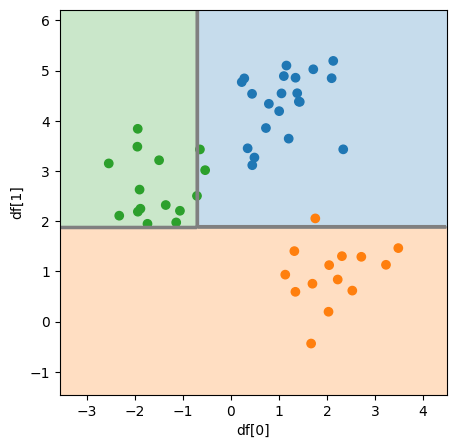

In [8]:
model = DecisionTreeClassifier(max_depth = 2, random_state = 0)
model.fit(X_train, y_train)

pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print('정답률 :', score*100, '%')

df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, 'df[0]', 'df[1]')


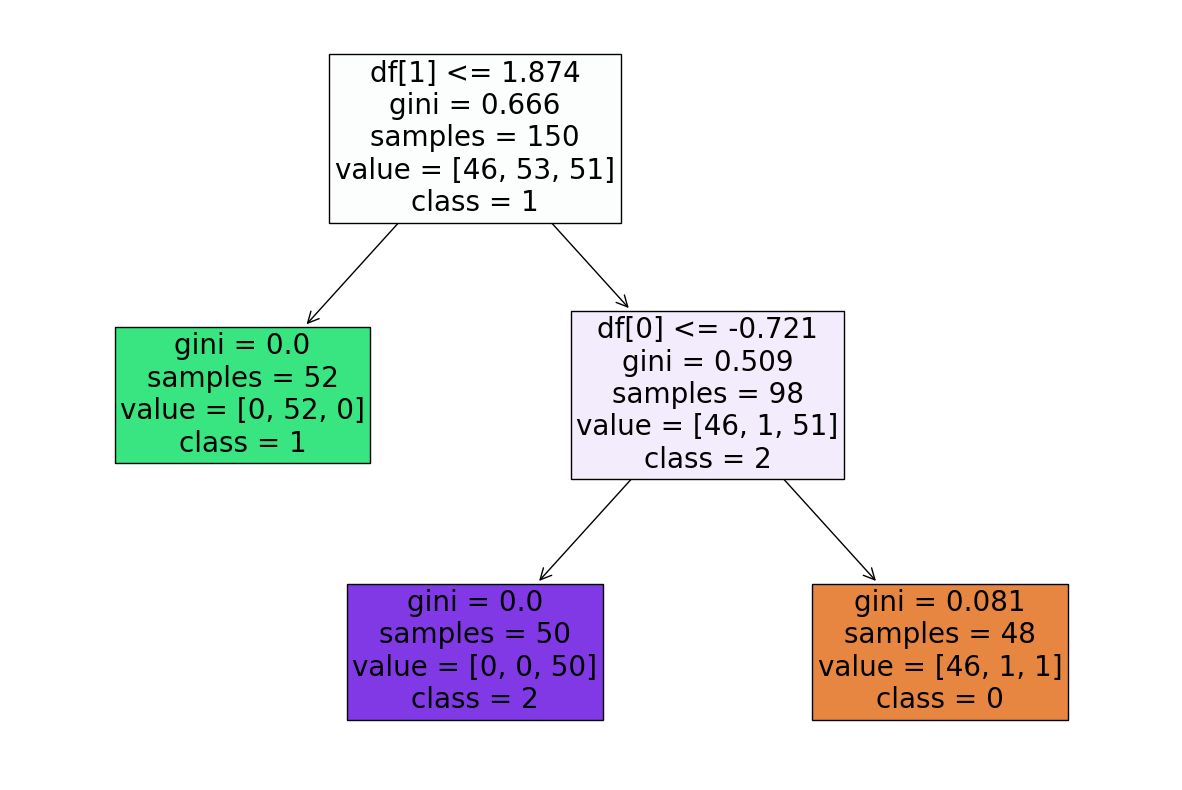

In [10]:
from sklearn.tree import plot_tree

plt.figure(figsize = (15,10))
plot_tree(model, fontsize = 20, filled = True,
          feature_names = ['df[0]', 'df[1]'],
          class_names = ['0', '1', '2'])
plt.show()

정답률 : 100.0 %


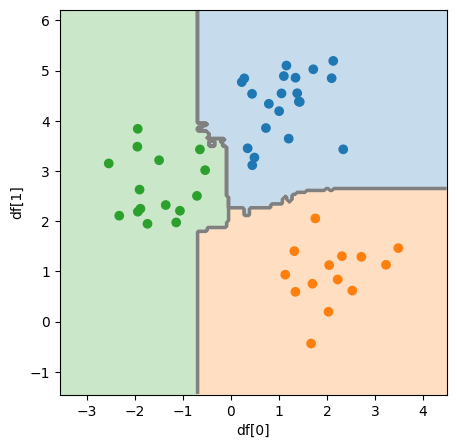

In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print('정답률 :', score*100, '%')

df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, 'df[0]', 'df[1]')


정답률 : 100.0 %


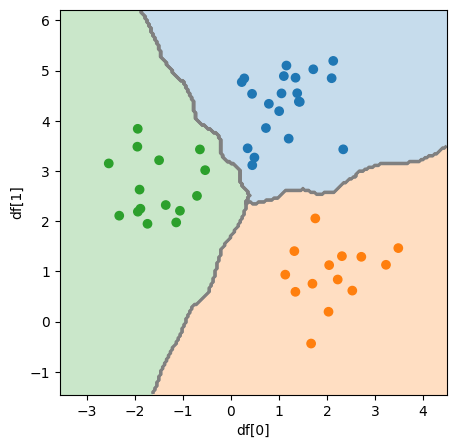

In [12]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print('정답률 :', score*100, '%')

df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, 'df[0]', 'df[1]')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


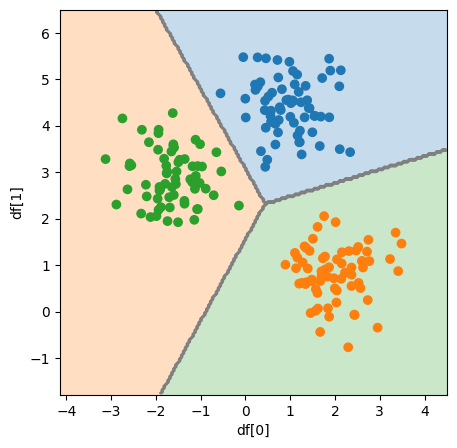

In [13]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 3)
model.fit(X)

df = pd.DataFrame(X)
plot_boundary(model, df[0], df[1], y, 'df[0]', 'df[1]')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


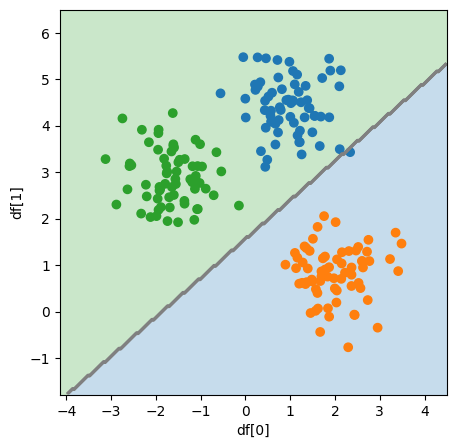

In [14]:
model = KMeans (n_clusters = 2)
model.fit(X)

df = pd.DataFrame(X)
plot_boundary(model, df[0], df[1], y, 'df[0]', 'df[1]')